<a href="https://colab.research.google.com/github/stefanciprian/rd/blob/main/backtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backtest VIX

In [ ]:
!pip install vectorbt pandas yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00
  Created wheel for vectorbt: filename=vectorbt-0.26.2-py3-none-any.whl size=527326 sha256=3b23913daf59bbcb44a03bff8824824fb6771afbe9e90ce96e69b0c0fd5d73dc
  Stored in directory: /root/.cache/pip/wheels/35/a3/d2/ae1a8cbf659fffc7d1890123df1a7fa2e7f6df587c1dca71cd
Successfully built vectorbt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      

In [ ]:
import vectorbt as vbt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2024-11-29')

# Define entry and exit signals
entries = vix_data['Close'] <= 14
exits = vix_data['Close'] >= 20

# Create a portfolio
portfolio = vbt.Portfolio.from_signals(
    vix_data['Close'],
    entries,
    exits,
    init_cash=20000,
    fees=0.001
)

# Simplified Equity Plot
portfolio.total_return().vbt.plot(title="Portfolio Total Return").show()
#portfolio['equity'].vbt.plot(title="Portfolio Equity Curve").show()
#portfolio.drawdowns.plot(title="Portfolio Drawdowns").show()
print(portfolio.drawdowns.records)

# Calculate and plot drawdown depth
drawdown_depth = portfolio.drawdowns.records['peak_val'] - portfolio.drawdowns.records['valley_val']

# Plot drawdown depth over time
# plt.figure(figsize=(10, 6))
# plt.plot(drawdown_depth, label="Drawdown Depth")
# plt.title("Drawdown Depth Over Time")
# plt.xlabel("Drawdown Events")
# plt.ylabel("Depth")
# plt.legend()
# plt.show()

# portfolio.drawdowns.records['valley_val'].vbt.plot(title="Drawdown Valley Values").show()



[*********************100%***********************]  1 of 1 completed


      id  col  peak_idx  start_idx  valley_idx  end_idx      peak_val  \
0      0    0      1121       1122        1122     1123  2.000000e+04   
1      1    0      1125       1126        1127     1130  2.296702e+04   
2      2    0      1130       1131        1136     1141  2.322427e+04   
3      3    0      1141       1142        1142     1143  2.345294e+04   
4      4    0      1144       1145        1148     1152  2.472492e+04   
..   ...  ...       ...        ...         ...      ...           ...   
103  103    0      6039       6040        6044     6047  1.897282e+08   
104  104    0      6047       6048        6051     6066  1.985902e+08   
105  105    0      6066       6067        6096     6101  2.128232e+08   
106  106    0      6101       6102        6106     6107  2.195369e+08   
107  107    0      6108       6109        6134     6184  2.582076e+08   

       valley_val       end_val  status  
0    1.998002e+04  2.116625e+04       1  
1    2.049453e+04  2.322427e+04       1

# QYLP & VYXL

In [1]:
pip install pandas numpy matplotlib yfinance

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: setting an array element with a sequence.

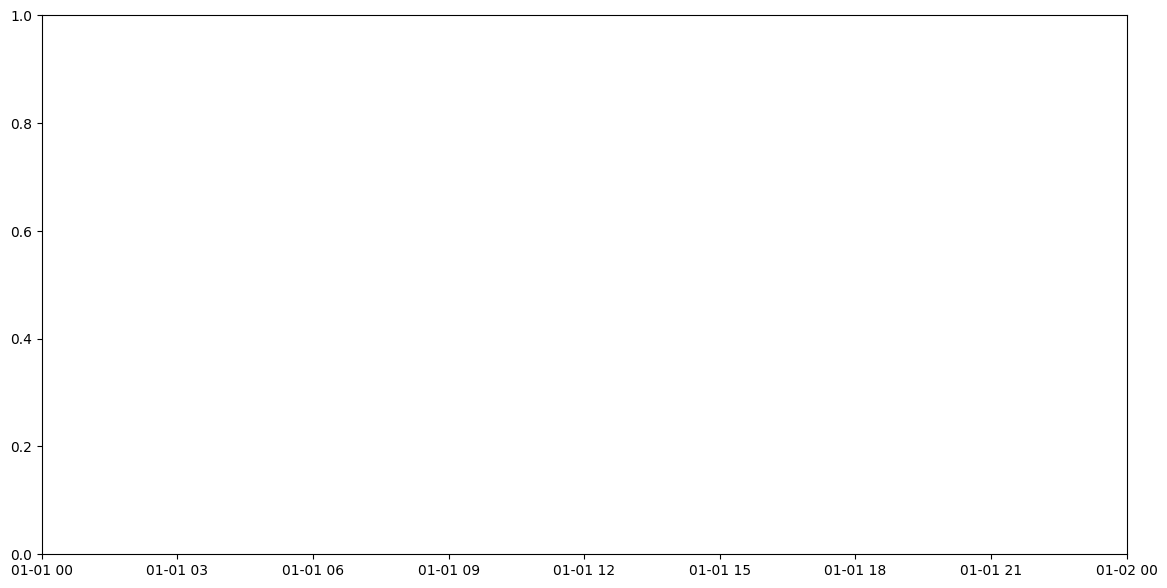

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Parameters
initial_investment = 10000
transaction_cost = 4
profit_target = 0.30
rebalance_frequency = '30D'  # Rebalance every 30 days
start_date = '2023-03-25'
end_date = '2025-03-25'

# Fetch historical data
qylp = yf.download('QYLP.L', start=start_date, end=end_date)
vixl = yf.download('VIXL.L', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Initialize investment allocations
qylp_allocation = 0.30  # 30% in QYLP
vixl_allocation = 0.05  # 5% in VIXL
sp500_allocation = 1.0   # 100% in S&P 500

# Initial portfolio values
qylp_investment = initial_investment * qylp_allocation
vixl_investment = initial_investment * vixl_allocation
sp500_investment = initial_investment
cash = initial_investment - qylp_investment - vixl_investment

# Calculate initial shares
qylp_shares = qylp_investment / qylp['Close'].iloc[0]
vixl_shares = vixl_investment / vixl['Close'].iloc[0]
portfolio_value = []

# Track rebalance dates
rebalance_dates = pd.date_range(start=start_date, end=end_date, freq=rebalance_frequency)

# Simulation loop
for date in qylp.index:
    if date not in vixl.index or date not in sp500.index:
        continue  # Skip dates where data is missing

    # Update asset values
    qylp_value = qylp_shares * qylp.loc[date, 'Close']
    vixl_value = vixl_shares * vixl.loc[date, 'Close']

    # Check for dividends (QYLP)
    if 'Dividends' in qylp.columns and not np.isnan(qylp.loc[date, 'Dividends']):
        dividend = qylp.loc[date, 'Dividends'] * qylp_shares
        cash += dividend

    # Rebalance portfolio if it's a rebalance date
    if date in rebalance_dates:
        total_value = qylp_value + vixl_value + cash
        qylp_target = total_value * qylp_allocation
        vixl_target = total_value * vixl_allocation

        # Use .item() to get a single float value instead of a Series
        qylp_shares = (qylp_target - transaction_cost) / float(qylp.loc[date, 'Close'].iloc[0])
        vixl_shares = (vixl_target - transaction_cost) / float(vixl.loc[date, 'Close'].iloc[0])


        cash = total_value - (qylp_target + vixl_target)

    # Track portfolio value
    total_value = qylp_value + vixl_value + cash
    portfolio_value.append({'Date': date, 'Total Value': total_value})

# Convert to DataFrame
portfolio_df = pd.DataFrame(portfolio_value).set_index('Date')

# S&P 500 Portfolio Calculation
sp500['Portfolio Value'] = sp500_investment * (sp500['Close'] / sp500['Close'].iloc[0])
sp500 = sp500.reindex(portfolio_df.index, method='ffill')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df.index, portfolio_df['Total Value'], label='Rebalanced QYLP + VIXL Strategy', color='blue')
plt.plot(sp500.index, sp500['Portfolio Value'], label='S&P 500', linestyle='dashed', color='orange')
plt.title('Rebalancing Strategy vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()